In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-inviter-conv)

We set up a $5\times 5$ triangular matrix with prescribed eigenvalues on its diagonal.

In [2]:
λ = [1, -0.75, 0.6, -0.4, 0]
# Make a triangular matrix with eigenvalues on the diagonal.
A = triu(ones(5, 5), 1) + diagm(λ)

5×5 Matrix{Float64}:
 1.0   1.0   1.0   1.0  1.0
 0.0  -0.75  1.0   1.0  1.0
 0.0   0.0   0.6   1.0  1.0
 0.0   0.0   0.0  -0.4  1.0
 0.0   0.0   0.0   0.0  0.0

We run inverse iteration with the shift $s=0.7$ and take the final estimate as our "exact" answer to observe the convergence.

In [3]:
s = 0.7
β, x = FNC.inviter(A, s, 30)
eigval = β[end]

0.5999999999999992

As expected, the eigenvalue that was found is the one closest to 0.7. The convergence is again linear.

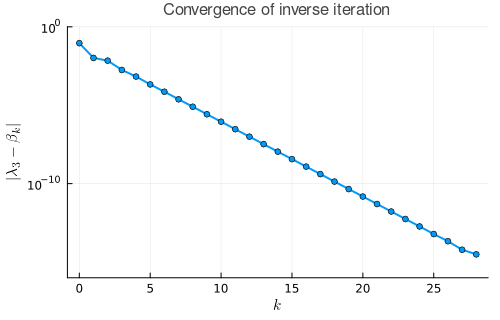

In [4]:
err = @. abs(eigval - β)
plot(0:28, err[1:end-1];
    m=:o,  xlabel=L"k", 
    yaxis=(L"|\lambda_3-\beta_k|", :log10, [1e-16, 1]),
    title="Convergence of inverse iteration")

The observed linear convergence rate is found from the data.

In [5]:
@show observed_rate = err[22] / err[21];

observed_rate = err[22] / err[21] = 0.333266963120285

```{index} ! Julia; sortperm
```

We reorder the eigenvalues to enforce {eq}`shiftorder`.
```{tip}
:class: dropdown
The `sortperm` function returns the index permutation needed to sort the given vector, rather than the sorted vector itself.
```

In [6]:
λ = λ[sortperm(abs.(λ .- s))]

5-element Vector{Float64}:
  0.6
  1.0
  0.0
 -0.4
 -0.75

Hence the theoretical convergence rate is

In [7]:
@show theoretical_rate = (λ[1] - s) / (λ[2] - s);

theoretical_rate = (λ[1] - s) / (λ[2] - s) = -0.3333333333333332
